In [1]:
#1-Processing Phase
#We import Panda Library in order to manipulate multidimentional array and we read the DataFrame by the function read cvs 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
df = pd.read_csv("titanic-passenger.csv", encoding="ISO8859-1", sep=";")

In [2]:
df.tail() #we display the last five row of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [3]:
df.info() #this code allows us to see the general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
encoder=LabelEncoder() #We transform the categorical data into numerical data for better use
df['Survived']=encoder.fit_transform(df['Survived'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
df.isnull().sum() #first we are going to see the number of missing value for each feature, here we have 3 inputs with missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print(df['Age'].isnull()) #try to indicate the position of missings values in the input Age

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Name: Age, Length: 891, dtype: bool


In [7]:
print(df['Age'].head().isnull())

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool


In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True) # we replace the missing values in the input Age by the mean because it's numerical data

In [9]:
print(df['Cabin'].value_counts()) #value_counts() show us the number of elements in the input Cabin

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64


In [10]:
df['Cabin'].fillna('G6', inplace=True) # we replace the missings values in the input Cabin by the most frequent value becayse we have categorical Data

In [11]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S
890,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.000000,0,0,250655,26.0000,G6,S


In [12]:
print(df['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [13]:
df['Embarked'].fillna('S', inplace=True)

In [14]:
df.isnull().sum().sum() # we check if there is missings values after the first traitement by displaying the sum of all missing values in the dataframe, 0 means there is no missing values left

0

In [15]:
df.isnull().sum() # it's a confirmation of what we said above

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
#2-Vizualisation 

In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

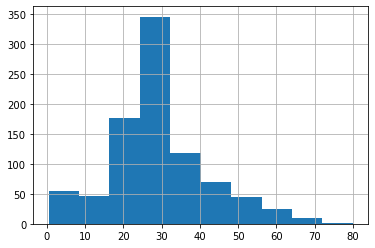

In [18]:
df['Age'].hist()

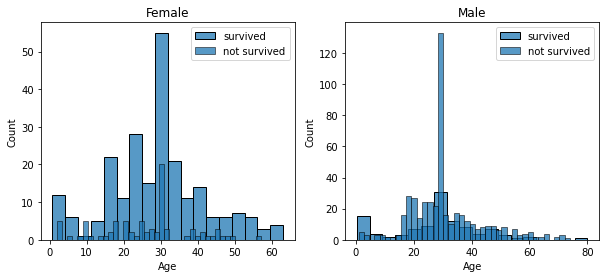

In [19]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

C:\Users\iboub\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


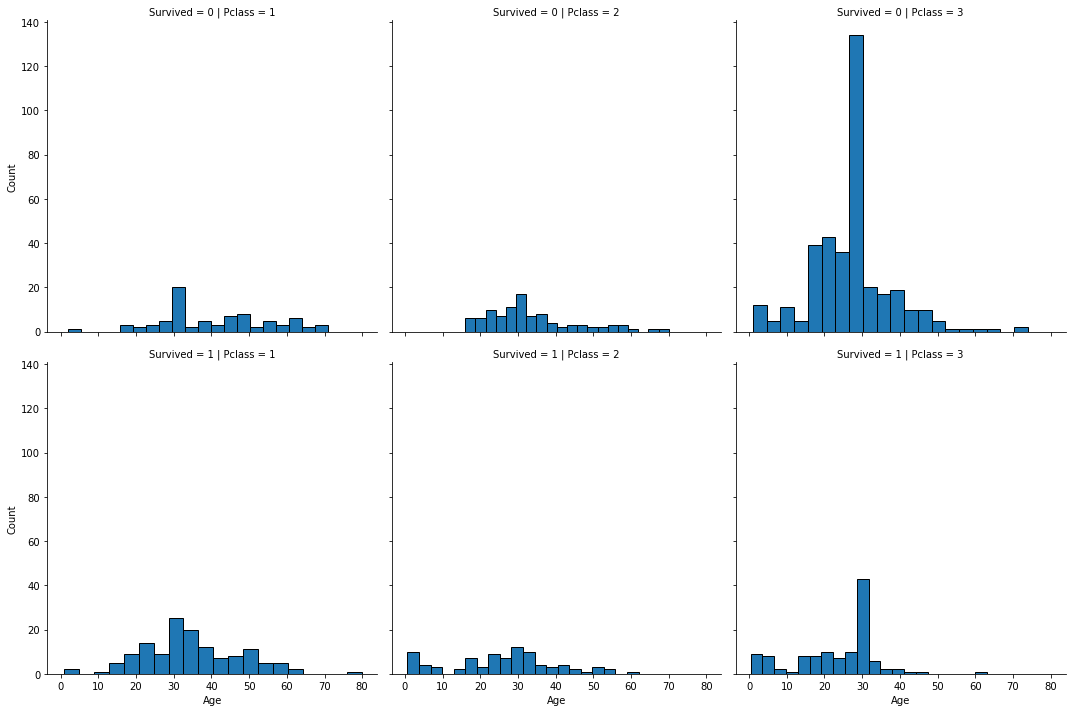

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.FacetGrid(df, col='Pclass', row='Survived', size=5)
g.map(sns.histplot,'Age', bins=20, alpha=1) 

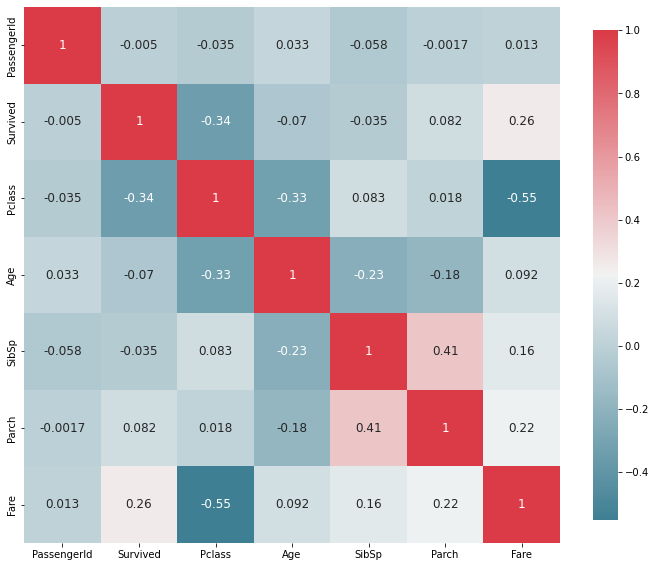

In [21]:
def plot_correlation_map( df ):

    df.corr()

s , ax = plt.subplots( figsize =( 12 , 10 ) )

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

s = sns.heatmap(

        df.corr(), 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

In [22]:
#This function highlights the different relationships that exist between the variables of the dataframe
#the color shows us the level of dependency between 2 variables, the higher the percentage the more the color turns red
# in our dataframe we can see that the price (Fare) is 50% dependent on the class (Pclass) and 
#In the same way we can see that the class chosen depends mainly on the price and the age of the passenger 
#We can observe that there is also a significant part of family present in the dataset (0,41% either brother/sister with their parent or husband/wife with their children) 

In [23]:
df.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,37.048118,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.866958,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.403259,0.615071,0.393075,13.675550


In [24]:
# It can be seen that 62% of the passengers in 1st class were monitored 
# while only 47% of 2nd class passengers were monitored 
# and 27% of the passengers in 3rd class were monitored
# Therefore we have more chance to survive in 1st class  

In [25]:
# we will proceed to the extraction of the titles in the name column using the "extract" function
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


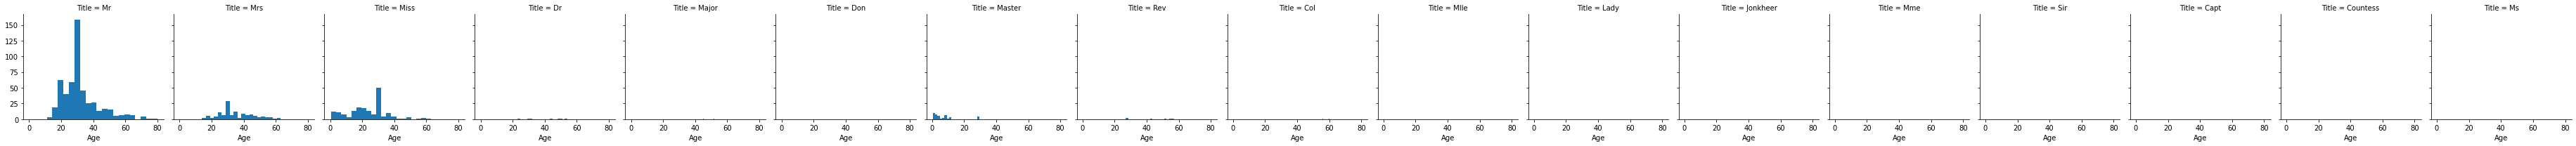

In [26]:
# to visualize the relationship between the new Input Title and the age, we use a histogram
h=sns.FacetGrid(df, col='Title')
h.map(plt.hist,'Age', bins=20)
# we realize that the data are not visible enough due to the fact that there are many values in Title, so the analysis will not be relevant

In [27]:
# we use the 'replace' function to replace some titles that are not useful or not common by the most known titles
# after this operation we will have 5 titles in total instead of 17 which is much better
df['Title']=df['Title'].replace(["Capt","Col","Major","Dr","Rev"],"Officer")
df['Title']=df['Title'].replace(["Jonkheer","Don","Sir", "Lady","the Countess","Dona"],"Royalty")
df['Title']=df['Title'].replace(["Ms","Mr","Mrs"],"Mrs")
df['Title']=df['Title'].replace(["Mme","Mlle","Miss"],"Miss")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S,Mrs
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S,Mrs
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs


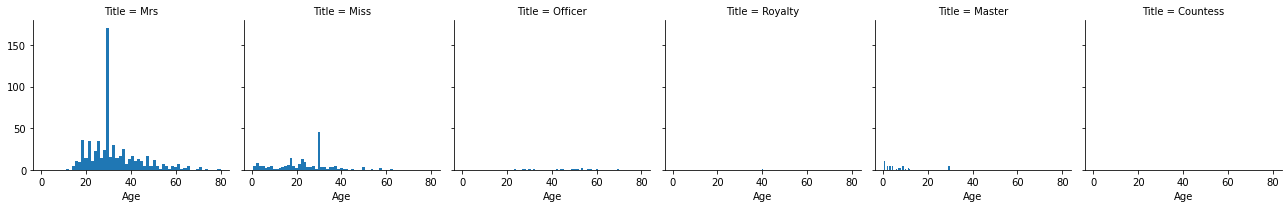

In [28]:
# Following the replacement we have clearer and more readable graphs between the age and the title 
# we can see that the age range most represented in the "Mrs" is from 20 to 40 years with a peak at 30 years then
# while for the "Miss" the most represented age range is from 0 to 20 years
h=sns.FacetGrid(df, col='Title')
h.map(plt.hist,'Age', bins=50)

In [29]:
# we associate the 2 inputs SibSp and Parch in a single future named familysize to facilitate the analysis
df['Familysize'] = df['SibSp'] + df['Parch']
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,G6,S,Mrs,2
6,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,G6,S,Mrs,0
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,G6,C,Miss,2
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,G6,S,Mrs,0
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,G6,S,Mrs,1


In [30]:
df.groupby(["Familysize"]).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Familysize,,,,,,,
0,458.000000,0.303538,2.400372,31.595871,0.000000,0.000000,21.242689
1,412.838509,0.552795,1.919255,31.160252,0.763975,0.236025,49.894129
2,448.352941,0.578431,2.225490,26.359040,0.872549,1.127451,39.692482
3,514.344828,0.724138,2.068966,19.062698,1.344828,1.655172,54.864510
4,367.866667,0.200000,2.666667,23.186431,2.133333,1.866667,58.094453
5,400.136364,0.136364,2.590909,18.409091,2.818182,2.181818,73.722727
6,355.750000,0.333333,3.000000,15.166667,3.250000,2.750000,29.366667
7,393.833333,0.000000,3.000000,15.666667,4.333333,2.666667,46.900000
10,481.714286,0.000000,3.000000,29.699118,8.000000,2.000000,69.550000


In [31]:
# We notice that the average survival rate of passengers with 3 family members is 72%, therefore higher
# while passengers with more than 7 family members have no chance of survival 

#Logistic Regression

In [32]:
encoder=LabelEncoder() #We transform the categorical data into numerical data for better use
df['Sex']=encoder.fit_transform(df['Sex'])   #convert sex variable into numerical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs,1


In [33]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S,3.0,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S,3.0,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S,3.0,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S,3.0,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S,3.0,1


In [34]:
x = df[['Pclass','Sex','Age','Fare','Familysize','Title']]
y = df['Survived']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

In [36]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


#CONFUSION MATRIX

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

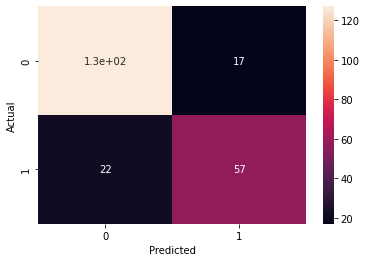

In [37]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       144
           1       0.77      0.72      0.75        79

    accuracy                           0.83       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



#ROC / AUC

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. 
If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.
When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values.
When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points.

In [40]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred, pos_label=1)

In [41]:
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1)

0.8017317158931082


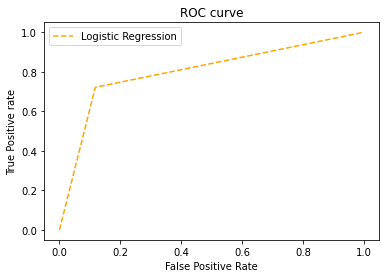

In [42]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();